In [1]:
import pandas as pd

### Load the data

In [2]:
data = pd.read_csv('data/steam-200k.csv', header=None)
data = data.drop(4, axis=1)  # the csv seems not well formatted because pandas sees a 5th column in the csv
data

,0,1,2,3
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [3]:
cols = ['User ID',
 'game', 
 'status', 
 'Hours']

data.rename(columns=dict(zip(data.columns,cols)), inplace=True)

data

,User ID,game,status,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User ID  200000 non-null  int64  
 1   game     200000 non-null  object 
 2   status   200000 non-null  object 
 3   Hours    200000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


### Check for NaN values

In [5]:
data.isna().sum()

User ID    0
game       0
status     0
Hours      0
dtype: int64

### Drop duplicates

In [6]:
mask_duplicated = data.duplicated()

data.loc[mask_duplicated]

,User ID,game,status,Hours
1968,11373749,Sid Meier's Civilization IV,purchase,1.0
1970,11373749,Sid Meier's Civilization IV Beyond the Sword,purchase,1.0
1972,11373749,Sid Meier's Civilization IV Warlords,purchase,1.0
2724,56038151,Grand Theft Auto San Andreas,purchase,1.0
2726,56038151,Grand Theft Auto Vice City,purchase,1.0
...,...,...,...,...
194392,39146470,Sid Meier's Civilization IV Warlords,purchase,1.0
195517,48666962,Crysis 2,purchase,1.0
195821,112845094,Grand Theft Auto San Andreas,purchase,1.0
195823,112845094,Grand Theft Auto Vice City,purchase,1.0


In [7]:
data.loc[(data['User ID']==39146470) & (data['game']=="Sid Meier's Civilization IV")]

,User ID,game,status,Hours
194385,39146470,Sid Meier's Civilization IV,purchase,1.0
194386,39146470,Sid Meier's Civilization IV,purchase,1.0


In [8]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Feature engineering:
In this dataset, there are two status: purchased and played.
The status played


In [9]:
data.groupby(['User ID', 'game']).agg({'status': list})

status
User ID   game                                          
5250      Alien Swarm                   [purchase, play]
          Cities Skylines               [purchase, play]
          Counter-Strike                      [purchase]
          Counter-Strike Source               [purchase]
          Day of Defeat                       [purchase]
...                                                  ...
309626088 Age of Empires II HD Edition  [purchase, play]
309812026 Counter-Strike Nexon Zombies        [purchase]
          Robocraft                           [purchase]
309824202 Dota 2                        [purchase, play]
309903146 Dota 2                        [purchase, play]

[128804 rows x 1 columns]

### Below we can see that in the dataset it doesnt exist a game played but not purchased

In [10]:
data.groupby(['User ID', 'game']).agg({'status': list})['status'].apply(lambda x: set(x) == {'play'}).any()

False

### .. so it is legitimate get rid of the "purchase" status and only let hours played

In [11]:
data

,User ID,game,status,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [12]:
data.loc[data['status']=='purchase']['Hours'].value_counts()

1.0    128804
Name: Hours, dtype: int64

In [13]:
def minus_one(x):
    return sum(x)-1

# minus one because the "1.0" hours for purchased game mean only that the purchase was done not the 
# actual duration of the play
data = data.groupby(['User ID', 'game']).agg({'Hours': minus_one}).reset_index()
data

,User ID,game,Hours
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
2,5250,Counter-Strike,0.0
3,5250,Counter-Strike Source,0.0
4,5250,Day of Defeat,0.0
...,...,...,...
128799,309626088,Age of Empires II HD Edition,6.7
128800,309812026,Counter-Strike Nexon Zombies,0.0
128801,309812026,Robocraft,0.0
128802,309824202,Dota 2,0.7


### Keep only games played. Indeed it is not possible to score a game that the user has never played.

In [14]:
data = data.query('Hours != 0')
data

,User ID,game,Hours
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
6,5250,Deus Ex Human Revolution,62.0
7,5250,Dota 2,0.2
17,5250,Portal 2,13.6
...,...,...,...
128797,309434439,Dota 2,0.8
128798,309554670,Mitos.is The Game,5.9
128799,309626088,Age of Empires II HD Edition,6.7
128802,309824202,Dota 2,0.7


In [15]:
data['game'].nunique()

3600

In [16]:
data.groupby('game').agg({'Hours': 'mean', 'User ID': 'count'}) \
.sort_values(by='Hours', ascending=False).iloc[:50]

,Hours,User ID
game,,
Eastside Hockey Manager,1295.000000,1
Baldur's Gate II Enhanced Edition,475.255556,9
FIFA Manager 09,411.000000,1
Perpetuum,400.975000,4
Football Manager 2014,391.984615,78
Football Manager 2012,390.453165,79
Football Manager 2010,375.048571,35
Football Manager 2011,365.703226,31
Freaking Meatbags,331.000000,1


In [17]:
min_max_games = data.groupby('game').agg({'Hours': ['min', 'max', 'count']}).reset_index()
min_max_games

game Hours            
                                                          min   max count
0                                           007 Legends   0.7   0.7     1
1                                             0RBITALIS   0.3   0.6     3
2     1... 2... 3... KICK IT! (Drop That Beat Like a...   0.2  11.2     5
3                                       10 Second Ninja   0.5   5.4     2
4                                            10,000,000   3.6   3.6     1
...                                                 ...   ...   ...   ...
3595                                         rymdkapsel   1.1   1.1     1
3596                                       sZone-Online   0.1   6.7    58
3597                          the static speaks my name   0.1   0.5     8
3598                                          theHunter   0.1  95.0   124
3599                                   theHunter Primal   0.9  71.0     4

[3600 rows x 4 columns]

In [18]:
for idx, row in data.iterrows():
    mask = min_max_games['game'] == row["game"]
    min_ = min_max_games.loc[mask]['Hours', 'min'].values[0]
    max_ = min_max_games.loc[mask]['Hours', 'max'].values[0]
    data.loc[idx, 'Hours'] = (data.loc[idx, 'Hours'] - min_) / (max_ - min_ + 1e-10)

In [19]:
(data['Hours']==0).sum()

4965

<AxesSubplot: xlabel='game'>

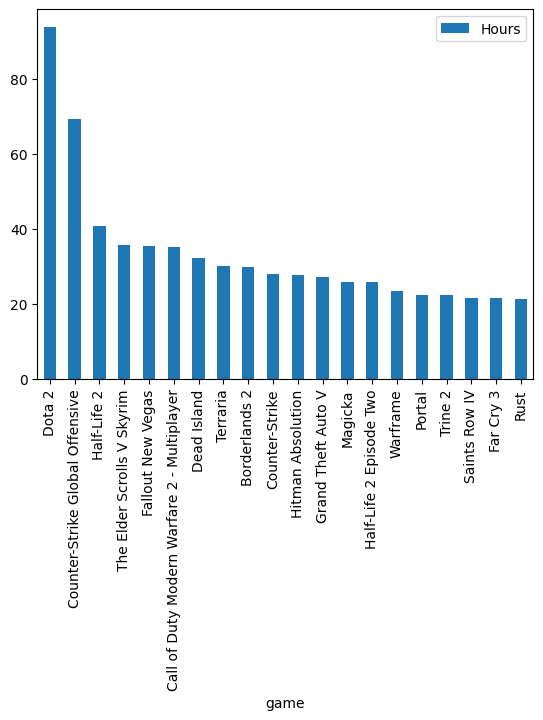

In [20]:
import matplotlib.pyplot as plt

data.groupby('game').agg({'Hours': 'sum'}).sort_values(by='Hours', ascending=False).iloc[:20].plot.bar()

# plt.xticks(rotation=45)
